# Esempi utilizzo pandas

In [1]:
import pandas as pd
import datetime as dt

In [2]:
now = dt.datetime.now()
date_time = now.strftime("%Y-%m-%d-%H%M%S")

data_inizio = now.date()
data_fine = now.date()
print(type(date_time))
print(type(data_inizio))
print(type(now))


<class 'str'>
<class 'datetime.date'>
<class 'datetime.datetime'>


In [3]:

# drinks = pd.read_csv('http://bit.ly/drinksbycountry')
# movies = pd.read_csv('http://bit.ly/imdbratings')
# orders = pd.read_csv('http://bit.ly/chiporders', sep='\t')
# # orders['item_price'] = orders.item_price.str.replace('$', '').astype('float')
# stocks = pd.read_csv('http://bit.ly/smallstocks', parse_dates=['Date'])
# titanic = pd.read_csv('http://bit.ly/kaggletrain')
ufo = pd.read_csv('http://bit.ly/uforeports', parse_dates=['Time'])


In [7]:
print(ufo.shape)
print(ufo.columns)
print(ufo.info())

(18241, 5)
Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18241 entries, 0 to 18240
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   City             18215 non-null  object        
 1   Colors Reported  2882 non-null   object        
 2   Shape Reported   15597 non-null  object        
 3   State            18241 non-null  object        
 4   Time             18241 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 712.7+ KB
None


In [8]:
ufo["Shape Reported"] = ufo["Shape Reported"].astype("category")

In [13]:
print(ufo.info())
print(ufo["Shape Reported"].value_counts())
print(len(ufo["Shape Reported"].value_counts()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18241 entries, 0 to 18240
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   City             18215 non-null  object        
 1   Colors Reported  2882 non-null   object        
 2   Shape Reported   15597 non-null  category      
 3   State            18241 non-null  object        
 4   Time             18241 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](1), object(3)
memory usage: 589.2+ KB
None
Shape Reported
LIGHT        2803
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
VARIOUS       333
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
ROUND           2
CRESCENT        2
DOME         

In [16]:
ufo["Shape Reported"].isna().sum()

np.int64(0)

In [15]:
ufo["Shape Reported"].fillna("VARIOUS", inplace=True)

<Axes: xlabel='Shape Reported'>

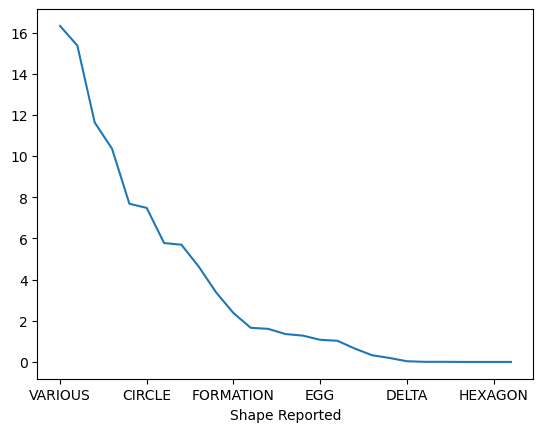

In [17]:
ufo_shape = ufo["Shape Reported"].value_counts(normalize=True)*100
ufo_shape.plot()
# [0:3].plot()

In [8]:
ufo["Data"]=ufo["Time"].dt.normalize()
print(ufo["Data"])

0       1930-06-01
1       1930-06-30
2       1931-02-15
3       1931-06-01
4       1933-04-18
           ...    
18236   2000-12-31
18237   2000-12-31
18238   2000-12-31
18239   2000-12-31
18240   2000-12-31
Name: Data, Length: 18241, dtype: datetime64[ns]


In [9]:
ufo.iloc[0:3,0:]


,City,Colors Reported,Shape Reported,State,Time,Data
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930-06-01
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930-06-30
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931-02-15


In [10]:
ufo.loc[0:3,"City":"Data"]

,City,Colors Reported,Shape Reported,State,Time,Data
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930-06-01
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930-06-30
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931-02-15
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931-06-01


In [11]:
ufo.sort_values(by="Time", ascending=False)


,City,Colors Reported,Shape Reported,State,Time,Data
18240,Ybor,NaN,OVAL,FL,2000-12-31 23:59:00,2000-12-31
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00,2000-12-31
18238,Eagle River,NaN,VARIOUS,WI,2000-12-31 23:45:00,2000-12-31
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00,2000-12-31
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00,2000-12-31
...,...,...,...,...,...,...
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933-04-18
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931-06-01
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931-02-15
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930-06-30


In [12]:

ufo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18241 entries, 0 to 18240
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   City             18216 non-null  object        
 1   Colors Reported  2882 non-null   object        
 2   Shape Reported   18241 non-null  category      
 3   State            18241 non-null  object        
 4   Time             18241 non-null  datetime64[ns]
 5   Data             18241 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](2), object(3)
memory usage: 731.7+ KB
